In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [41]:
def sign(x):
    if x > 0:
        return 1
    
    elif x == 0:
        return 0
    else:
        return -1

def create_database(min_value, max_value, d, number_of_points):
    """Creates a database of random points with a specified range and number of dimensions."""
    return np.random.uniform(min_value, max_value, (number_of_points, d + 2))

def get_target_points(min_value, max_value, d):
    """Generates random points representing the endpoints of a line."""
    return np.random.uniform(min_value, max_value, (2, d))

def get_target_function(point1, point2):
    """Calculates the coefficients of the line passing through two random points."""
    a = (point2[1] - point1[1]) / (point2[0] - point1[0])  # Slope
    b = point1[1] - a * point1[0]  # Intercept
    return [a, b]

def is_above_line(point, coefficients):
    """Checks if a point is above a line defined by its coefficients."""
    return sign(point[1] - (coefficients[0] * point[0] + coefficients[1]))

def target_function_to_database(database, coefficients):
    """Assigns labels to points in the database based on their position relative to a line."""
    for i in range(len(database)):
        x = database[i][1]
        y = database[i][2]

        database[i][0] = 1 # Add x0

        database[i][-1] = is_above_line([x, y], coefficients) # Add yn
    
    return database

def calculate_divergence_probability(test_database, w):
    real_values = test_database[:,3]
    calculated_values = np.sign(test_database[:,:3] @  w)
    equal_elements = calculated_values == real_values

    return 1 - np.sum(equal_elements)/len(real_values)

def pla(target_database, max_iterations, initial_w = None):

    iterations = 0

    if initial_w is not None:
        w = initial_w
    else: 
        w = np.array([0, 0, 0]) 
    while iterations < max_iterations:
        iterations+=1
        
        misclassified_points_index = []

        for i in range(len(target_database)):
            point = target_database[i]
            if sign(point[:3] @ w) != point[3]:
                misclassified_points_index.append(i)
        if len(misclassified_points_index) == 0: # Convergence
            break

       # print(misclassified_points_index)
        
        random_index = random.choice(misclassified_points_index)        
        misclassified_point = target_database[random_index]

        w = w + (misclassified_point[3] * misclassified_point[:3])
    
    return w,iterations   
    

def linear_regression(d, N, target_train_database):
    
    X = target_train_database[:, :d+1]  # Pega as colunas x0, x1, ..., xd
    y = target_train_database[:, -1]    # Pega os rótulos

    # Calcula g = (X^T X)^-1 X^T y
    X_transpose = X.T
    pseudo_inverse = np.linalg.inv(X_transpose @ X) @ X_transpose
    g = pseudo_inverse @ y

    predictions = np.sign(X @ g)
    error_inside = np.mean(predictions != y)
    
    return g, error_inside

In [14]:
database = create_database(-1,1,2,10)
target_points = get_target_points(-1, 1, 2)
coefficients = get_target_function(target_points[0], target_points[1])

target_database = target_function_to_database(database, coefficients)

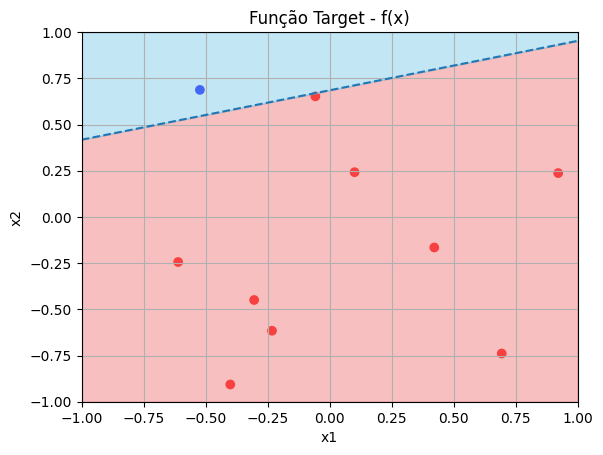

In [15]:
x1 = target_database[:, 1]
x2 = target_database[:, 2]
categories = target_database[:, 3]

# Colors by label
colors = ['red' if category == -1 else 'blue' for category in categories]

plt.scatter(x1, x2, c=colors, marker='o', label='Pontos')

plt.xlim(-1, 1)
plt.ylim(-1, 1)


plt.xlabel('x1')
plt.ylabel('x2')

plt.grid(True)
plt.title('Função Target - f(x)')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = coefficients[1] + coefficients[0] * x_vals

plt.plot(x_vals, y_vals, '--')

plt.fill_between(x_vals, y_vals, plt.ylim()[0], color='lightcoral', alpha=0.5)

plt.fill_between(x_vals, y_vals, plt.ylim()[1], color='skyblue', alpha=0.5)


plt.show()

In [16]:
w,iteration = pla(target_database, 10000)

test_database = create_database(-1,1,2,10000)
target_test_database = target_function_to_database(test_database, coefficients)

calculate_divergence_probability(target_test_database,w)

0.0534

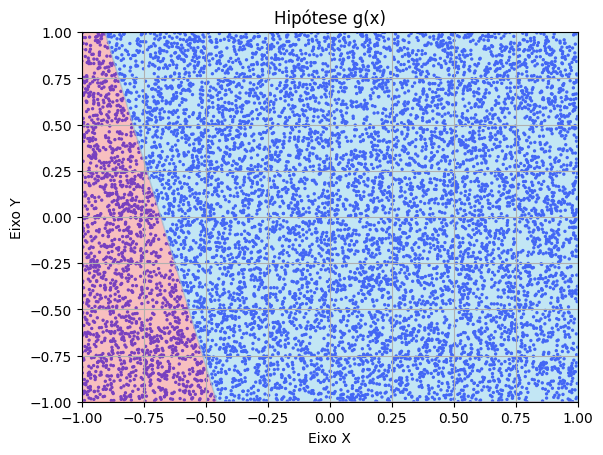

In [10]:
x1 = test_database[:, 1]
x2 = test_database[:, 2]
categories = np.sign(target_test_database[:,:3] @  w)

# Colors by label
colors = ['red' if category == -1 else 'blue' for category in categories]

plt.scatter(x1, x2, c=colors, marker='o', label='Pontos', s=2)

plt.xlim(-1, 1)
plt.ylim(-1, 1)


plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.grid(True)
plt.title('Hipótese g(x)')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = (-1*(w[0] + w[1]*x_vals))/w[2]


plt.plot(x_vals, y_vals, '--')

real_y_vals = coefficients[1] + coefficients[0] * x_vals



plt.fill_between(x_vals, real_y_vals, plt.ylim()[0], color='lightcoral', alpha=0.5)

plt.fill_between(x_vals, real_y_vals, plt.ylim()[1], color='skyblue', alpha=0.5)


plt.show()

In [11]:
x1 = target_database[:,1]
x2 =  target_database[:,2]
categories = calculated_values

# Colors by label
colors = ['red' if category == -1 else 'blue' for category in categories]

plt.scatter(x1, x2, c=colors, marker='o', label='Pontos', s=2)

plt.xlim(-1, 1)
plt.ylim(-1, 1)


plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.grid(True)
plt.title('Hipótese g(x)')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + a * x_vals


plt.plot(x_vals, y_vals, '--')

real_y_vals = coefficients[1] + coefficients[0] * x_vals



plt.fill_between(x_vals, real_y_vals, plt.ylim()[0], color='lightcoral', alpha=0.5)

plt.fill_between(x_vals, real_y_vals, plt.ylim()[1], color='skyblue', alpha=0.5)


plt.show()

NameError: name 'calculated_values' is not defined

In [3]:
def run_pla(d,N,max_iter,number_of_executions,test_size):

    sum_divergence_probability=0
    sum_iterations=0

    for i in range(number_of_executions):
        database = create_database(-1,1,d,N)

        target_points = get_target_points(-1, 1, d)
        coefficients = get_target_function(target_points[0], target_points[1])

        target_database = target_function_to_database(database, coefficients)

        w,iteration = pla(target_database, max_iter)
        
        test_database = create_database(-1,1,d,test_size)
        target_test_database = target_function_to_database(test_database, coefficients)

        divergence_probability = calculate_divergence_probability(target_test_database,w)

        sum_divergence_probability+=divergence_probability
        sum_iterations+=iteration
    
    return sum_divergence_probability/number_of_executions, sum_iterations/number_of_executions

In [55]:
def run_linear_regression(d, N, number_of_executions, test_size):
    
    sum_error_inside = 0
    sum_error_outside = 0


    for i in range(number_of_executions):

        train_database = create_database(-1, 1, d, N)
        random_points = get_target_points(-1, 1, d)
        coefficients = get_target_function(random_points[0], random_points[1])
        target_train_database = target_function_to_database(train_database, coefficients)

        g, error_inside = linear_regression(d, N, target_train_database)

        test_database = create_database(-1, 1, d, test_size)
        target_test_database = target_function_to_database(test_database, coefficients)

        error_outside = calculate_out_of_sample_error(g, target_test_database)
        sum_error_inside += error_inside
        sum_error_outside += error_outside
    return sum_error_inside / number_of_executions, sum_error_outside / number_of_executions


In [61]:
def run_linear_and_pla(d, N, max_iter, number_of_executions, test_size):
    sum_divergence_probability = 0
    sum_iterations = 0

    for i in range(number_of_executions):
        train_database = create_database(-1, 1, d, N)
        target_points = get_target_points(-1, 1, d)
        coefficients = get_target_function(target_points[0], target_points[1])
        target_train_database = target_function_to_database(train_database, coefficients)

        g, error_inside = linear_regression(d, N, target_train_database)

    
        initial_w = g
        
        target_database = target_function_to_database(train_database, coefficients)

        w, iteration = pla(target_database, max_iter, initial_w)
        
        test_database = create_database(-1, 1, d, test_size)
        target_test_database = target_function_to_database(test_database, coefficients)

        divergence_probability = calculate_divergence_probability(target_test_database, w)

        sum_divergence_probability += divergence_probability
        sum_iterations += iteration
    
    return sum_divergence_probability / number_of_executions, sum_iterations / number_of_executions

## PLA

In [9]:
mean_divergence_probability, mean_iterations = run_pla(d=2,N=10,max_iter=10000,number_of_executions=1000, test_size=10000)
print("PLA for N = 10")
print(f"Mean Divergence Probability = {mean_divergence_probability}")
print(f"Mean Iterations = {mean_iterations}")

PLA for N = 10
Mean Divergence Probability = 0.10929530000000003
Mean Iterations = 10.351


In [38]:
mean_divergence_probability, mean_iterations = run_pla(d=2,N=100,max_iter=10000,number_of_executions=1000, test_size=10000)
print("PLA for N = 100")
print(f"Mean Divergence Probability = {mean_divergence_probability}")
print(f"Mean Iterations = {mean_iterations}")


PLA for N = 100
Mean Divergence Probability = 0.013642599999999989
Mean Iterations = 114.787


In [39]:
mean_divergence_probability, mean_iterations = run_pla(d=2,N=200,max_iter=10000,number_of_executions=1000, test_size=10000)
print("PLA for N = 200")
print(f"Mean Divergence Probability = {mean_divergence_probability}")
print(f"Mean Iterations = {mean_iterations}")


PLA for N = 200
Mean Divergence Probability = 0.006581399999999993
Mean Iterations = 212.198


## Linear Regression

In [40]:
mean_error_inside, mean_error_outside = run_linear_regression(d=2,N=100,number_of_executions=1000, test_size=1000)
print("Linear Regression for N = 100")
print(f"Mean Inside Error = {mean_error_inside}")
print(f"Mean Outside error = {mean_error_outside}")

Linear Regression for N = 100
Mean Inside Error = 0.0393600000000001
Mean Outside error = 0.048127000000000024


In [62]:
mean_divergence_probability, mean_iterations = run_linear_and_pla(d=2,N=10,max_iter=10000,number_of_executions=1000, test_size=10000)
print("PLA for N = 10")
print(f"Mean Divergence Probability = {mean_divergence_probability}")
print(f"Mean Iterations = {mean_iterations}")


PLA for N = 10
Mean Divergence Probability = 0.10957029999999995
Mean Iterations = 12.574
